# Attenuation coefficients

Evgeny Kolonsky, Oct 2024

v0.1.2


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

#Reference data

https://physics.nist.gov/PhysRefData/XrayMassCoef/tab3.html

In [167]:
NIST = {
    'Al':  '''
#     Energy       μ/ρ        μen/ρ
#      (MeV)      (cm2/g)     (cm2/g)
#____________________________________
#
   1.00000E-03  1.185E+03  1.183E+03
   1.50000E-03  4.022E+02  4.001E+02
   1.55960E-03  3.621E+02  3.600E+02
   1.55960E-03  3.957E+03  3.829E+03
   2.00000E-03  2.263E+03  2.204E+03
   3.00000E-03  7.880E+02  7.732E+02
   4.00000E-03  3.605E+02  3.545E+02
   5.00000E-03  1.934E+02  1.902E+02
   6.00000E-03  1.153E+02  1.133E+02
   8.00000E-03  5.033E+01  4.918E+01
   1.00000E-02  2.623E+01  2.543E+01
   1.50000E-02  7.955E+00  7.487E+00
   2.00000E-02  3.441E+00  3.094E+00
   3.00000E-02  1.128E+00  8.778E-01
   4.00000E-02  5.685E-01  3.601E-01
   5.00000E-02  3.681E-01  1.840E-01
   6.00000E-02  2.778E-01  1.099E-01
   8.00000E-02  2.018E-01  5.511E-02
   1.00000E-01  1.704E-01  3.794E-02
   1.50000E-01  1.378E-01  2.827E-02
   2.00000E-01  1.223E-01  2.745E-02
   3.00000E-01  1.042E-01  2.816E-02
   4.00000E-01  9.276E-02  2.862E-02
   5.00000E-01  8.445E-02  2.868E-02
   6.00000E-01  7.802E-02  2.851E-02
   8.00000E-01  6.841E-02  2.778E-02
   1.00000E+00  6.146E-02  2.686E-02
   1.25000E+00  5.496E-02  2.565E-02
   1.50000E+00  5.006E-02  2.451E-02
   2.00000E+00  4.324E-02  2.266E-02
   3.00000E+00  3.541E-02  2.024E-02
   4.00000E+00  3.106E-02  1.882E-02
   5.00000E+00  2.836E-02  1.795E-02
   6.00000E+00  2.655E-02  1.739E-02
   8.00000E+00  2.437E-02  1.678E-02
   1.00000E+01  2.318E-02  1.650E-02
   1.50000E+01  2.195E-02  1.631E-02
   2.00000E+01  2.168E-02  1.633E-02
''',

'Ni': '''
#Energy       μ/ρ        μen/ρ
#      (MeV)      (cm2/g)     (cm2/g)
#____________________________________
#
   1.00000E-03  9.855E+03  9.797E+03
   1.00404E-03  9.753E+03  9.697E+03
   1.00810E-03  9.654E+03  9.598E+03
   1.00810E-03  1.099E+04  1.093E+04
   1.50000E-03  4.234E+03  4.214E+03
   2.00000E-03  2.049E+03  2.039E+03
   3.00000E-03  7.094E+02  7.042E+02
   4.00000E-03  3.282E+02  3.244E+02
   5.00000E-03  1.793E+02  1.761E+02
   6.00000E-03  1.090E+02  1.064E+02
   8.00000E-03  4.952E+01  4.758E+01
   8.33280E-03  4.428E+01  4.242E+01
   8.33280E-03  3.294E+02  2.240E+02
   1.00000E-02  2.090E+02  1.524E+02
   1.50000E-02  7.081E+01  5.734E+01
   2.00000E-02  3.220E+01  2.722E+01
   3.00000E-02  1.034E+01  8.982E+00
   4.00000E-02  4.600E+00  3.967E+00
   5.00000E-02  2.474E+00  2.078E+00
   6.00000E-02  1.512E+00  1.219E+00
   8.00000E-02  7.306E-01  5.259E-01
   1.00000E-01  4.440E-01  2.781E-01
   1.50000E-01  2.208E-01  9.812E-02
   2.00000E-01  1.582E-01  5.649E-02
   3.00000E-01  1.154E-01  3.659E-02
   4.00000E-01  9.765E-02  3.209E-02
   5.00000E-01  8.698E-02  3.036E-02
   6.00000E-01  7.944E-02  2.937E-02
   8.00000E-01  6.891E-02  2.795E-02
   1.00000E+00  6.160E-02  2.674E-02
   1.25000E+00  5.494E-02  2.536E-02
   1.50000E+00  5.015E-02  2.420E-02
   2.00000E+00  4.387E-02  2.257E-02
   3.00000E+00  3.745E-02  2.107E-02
   4.00000E+00  3.444E-02  2.066E-02
   5.00000E+00  3.289E-02  2.070E-02
   6.00000E+00  3.210E-02  2.094E-02
   8.00000E+00  3.164E-02  2.163E-02
   1.00000E+01  3.185E-02  2.234E-02
   1.50000E+01  3.320E-02  2.368E-02
   2.00000E+01  3.476E-02  2.446E-02
''',

'Pb': '''
#Energy       μ/ρ        μen/ρ
#      (MeV)      (cm2/g)     (cm2/g)
#____________________________________
#
   1.00000E-03  5.210E+03  5.197E+03
   1.50000E-03  2.356E+03  2.344E+03
   2.00000E-03  1.285E+03  1.274E+03
   2.48400E-03  8.006E+02  7.895E+02
   2.48400E-03  1.397E+03  1.366E+03
   2.53429E-03  1.726E+03  1.682E+03
   2.58560E-03  1.944E+03  1.895E+03
   2.58560E-03  2.458E+03  2.390E+03
   3.00000E-03  1.965E+03  1.913E+03
   3.06640E-03  1.857E+03  1.808E+03
   3.06640E-03  2.146E+03  2.090E+03
   3.30130E-03  1.796E+03  1.748E+03
   3.55420E-03  1.496E+03  1.459E+03
   3.55420E-03  1.585E+03  1.546E+03
   3.69948E-03  1.442E+03  1.405E+03
   3.85070E-03  1.311E+03  1.279E+03
   3.85070E-03  1.368E+03  1.335E+03
   4.00000E-03  1.251E+03  1.221E+03
   5.00000E-03  7.304E+02  7.124E+02
   6.00000E-03  4.672E+02  4.546E+02
   8.00000E-03  2.287E+02  2.207E+02
   1.00000E-02  1.306E+02  1.247E+02
   1.30352E-02  6.701E+01  6.270E+01
   1.30352E-02  1.621E+02  1.291E+02
   1.50000E-02  1.116E+02  9.100E+01
   1.52000E-02  1.078E+02  8.807E+01
   1.52000E-02  1.485E+02  1.131E+02
   1.55269E-02  1.416E+02  1.083E+02
   1.58608E-02  1.344E+02  1.032E+02
   1.58608E-02  1.548E+02  1.180E+02
   2.00000E-02  8.636E+01  6.899E+01
   3.00000E-02  3.032E+01  2.536E+01
   4.00000E-02  1.436E+01  1.211E+01
   5.00000E-02  8.041E+00  6.740E+00
   6.00000E-02  5.021E+00  4.149E+00
   8.00000E-02  2.419E+00  1.916E+00
   8.80045E-02  1.910E+00  1.482E+00
   8.80045E-02  7.683E+00  2.160E+00
   1.00000E-01  5.549E+00  1.976E+00
   1.50000E-01  2.014E+00  1.056E+00
   2.00000E-01  9.985E-01  5.870E-01
   3.00000E-01  4.031E-01  2.455E-01
   4.00000E-01  2.323E-01  1.370E-01
   5.00000E-01  1.614E-01  9.128E-02
   6.00000E-01  1.248E-01  6.819E-02
   8.00000E-01  8.870E-02  4.644E-02
   1.00000E+00  7.102E-02  3.654E-02
   1.25000E+00  5.876E-02  2.988E-02
   1.50000E+00  5.222E-02  2.640E-02
   2.00000E+00  4.606E-02  2.360E-02
   3.00000E+00  4.234E-02  2.322E-02
   4.00000E+00  4.197E-02  2.449E-02
   5.00000E+00  4.272E-02  2.600E-02
   6.00000E+00  4.391E-02  2.744E-02
   8.00000E+00  4.675E-02  2.989E-02
   1.00000E+01  4.972E-02  3.181E-02
   1.50000E+01  5.658E-02  3.478E-02
   2.00000E+01  6.206E-02  3.595E-02
'''    }

# https://www.ias.ac.in/article/fulltext/pram/018/02/0121-0126
BETA = {
'Al': '''
# Emax/MeV, mu cm2/g
0.001 1e5
0.127	365.402
0.140	327.455
0.156	281.979
0.167	245.251
0.182	215.443
0.202	189.259
0.218	174.753
0.238	147.513
0.270	123.285
0.300	104.068
0.327	88.726
0.389	71.969
0.420	62.595
0.476	52.838
0.514	46.416
0.577	39.970
0.630	34.764
0.687	30.844
0.735	28.480
0.809	24.525
0.849	22.421
0.944	19.696
1.019	17.130
1.112	15.048
1.213	13.088
1.322	11.384
1.470	10.100
1.619	8.962
1.817	7.342
1.982	6.259
2.161	5.609
2.380	4.688
2.596	4.243
2.777	3.765
3.028	3.307
3.302	2.934
3.533	2.604
3.707	2.428
''',
'Pb': '''
# Emax/MeV, mu cm2/g
0.001 1e5
0.144	441.180
0.166	380.190
0.188	310.676
0.231	243.307
0.261	188.532
0.299	157.370
0.349	125.893
0.411	99.646
0.447	89.600
0.485	80.566
0.490	79.715
0.533	68.695
0.603	58.572
0.675	49.942
0.765	43.497
0.848	37.884
0.950	31.288
1.042	26.963
1.180	22.990
1.281	20.893
1.435	17.440
1.625	14.713
2.039	10.251
2.430	7.859
2.808	6.701
3.146	5.775
3.488	4.769
3.908	4.110
4.333	3.696
5.111	2.864
'''
}

def get_Emu(material, rays='gamma'):
  if rays == 'gamma':
    E_, murho_, muen_ =  np.genfromtxt(NIST[material].splitlines(), unpack=True)
  elif rays == 'beta':
    E_, murho_ =  np.genfromtxt(BETA[material].splitlines(), unpack=True)
  return E_, murho_

get_Emu('Al', 'gamma')
get_Emu('Ni',  'gamma')
get_Emu('Pb',  'gamma')
get_Emu('Al', 'beta')
get_Emu('Pb', 'beta')

(array([1.000e-03, 1.440e-01, 1.660e-01, 1.880e-01, 2.310e-01, 2.610e-01,
        2.990e-01, 3.490e-01, 4.110e-01, 4.470e-01, 4.850e-01, 4.900e-01,
        5.330e-01, 6.030e-01, 6.750e-01, 7.650e-01, 8.480e-01, 9.500e-01,
        1.042e+00, 1.180e+00, 1.281e+00, 1.435e+00, 1.625e+00, 2.039e+00,
        2.430e+00, 2.808e+00, 3.146e+00, 3.488e+00, 3.908e+00, 4.333e+00,
        5.111e+00]),
 array([1.00000e+05, 4.41180e+02, 3.80190e+02, 3.10676e+02, 2.43307e+02,
        1.88532e+02, 1.57370e+02, 1.25893e+02, 9.96460e+01, 8.96000e+01,
        8.05660e+01, 7.97150e+01, 6.86950e+01, 5.85720e+01, 4.99420e+01,
        4.34970e+01, 3.78840e+01, 3.12880e+01, 2.69630e+01, 2.29900e+01,
        2.08930e+01, 1.74400e+01, 1.47130e+01, 1.02510e+01, 7.85900e+00,
        6.70100e+00, 5.77500e+00, 4.76900e+00, 4.11000e+00, 3.69600e+00,
        2.86400e+00]))

In [162]:
# prompt: find interval of E to which energy belongs

def mu_interpolate(energy, material, decaytype ):
  ans = []
  E_, mu_ = get_Emu(material, decaytype)
  for en in energy:
    for i in range(len(E_) - 1):
      if en < E_[i+1] and en >= E_[i]:
        break
    dmu = mu_[i+1] - mu_[i]
    dE  = E_[i+1] - E_[i]
    mu_interpolated = mu_[i] + dmu * (en - E_[i]) / dE
    ans.append(mu_interpolated)
  return np.array(ans)


# Example usage
get_Emu('Al', 'beta')
energy_value = 0.7  # Replace with the desired energy value
material_name = 'Al' # Replace with material name

print( mu_interpolate([0.762], material='Al',decaytype='beta') )

print( mu_interpolate(np.array([ 0.762]), material='Pb', decaytype='beta') )

[27.03695946]
[43.71183333]


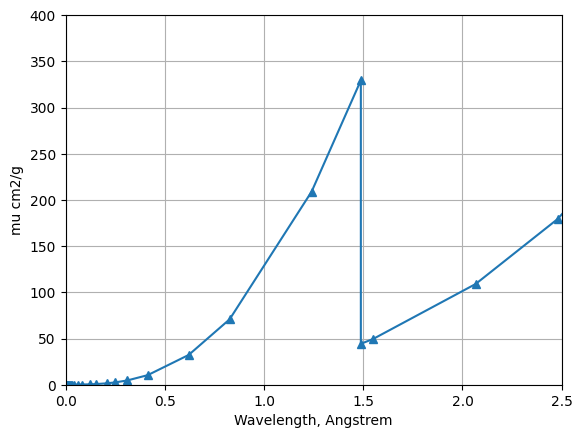

In [5]:
E, mu = get_Emu('Ni')
l = 12.398e-3 / E

plt.plot(l, mu, '-^')
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Wavelength, Angstrem')
plt.xlim(0, 2.5)
plt.ylim(0, 400)
plt.ylabel('mu cm2/g')
plt.grid()
plt.show()

*Elements of X-Ray Diffraction:*
B.D. Cullity S.R. Stock
Third Edition, p.12

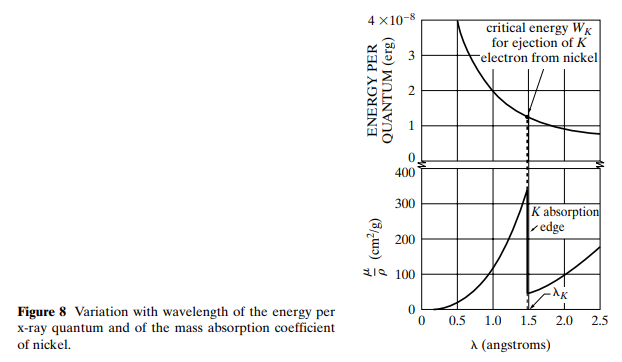

# $\beta$-decay energy spectrum

<img src='https://upload.wikimedia.org/wikipedia/commons/e/e6/Beta_spectrum_of_RaE.jpg' width=300>

approximation by linear dependence

$$
\frac{I}{I_{max}} + \frac{E}{E_{max}} = 1
$$

(0.01, 1.2)

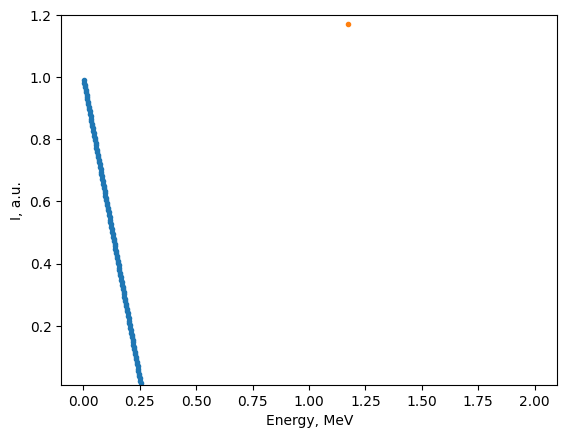

In [163]:
# initial approximation by linear
EMAX = 2.0 # MeV
EMIN = 2.5e-3 #MeV
N = 1000
Espace = np.linspace(EMIN, EMAX, N)
weights = np.diff(Espace, append=0)


def zero_spectrum():
  I = Espace * 0
  return I

def beta_spectrum(Emax):
  shrink = 1.2
  I  = zero_spectrum()
  I =  (1 - Espace / (Emax / shrink))
  I[I < 0] = 0
  return I

# delta-function
def gamma_spectrum(Energy):
  I  = zero_spectrum()
  index = np.argmin(np.abs(np.array(Espace)-Energy))
  I[index] =  Energy
  return I


beta_Emax = 0.31
gamma_Energy = 1.173
plt.plot(Espace, beta_spectrum(beta_Emax), '.')
plt.plot(Espace, gamma_spectrum(gamma_Energy), '.')
plt.xlabel('Energy, MeV')
plt.ylabel('I, a.u.')
plt.ylim(0.01, 1.2)
#plt.xscale('log')
#plt.yscale('log')



# Cobalt-60 vs Pb




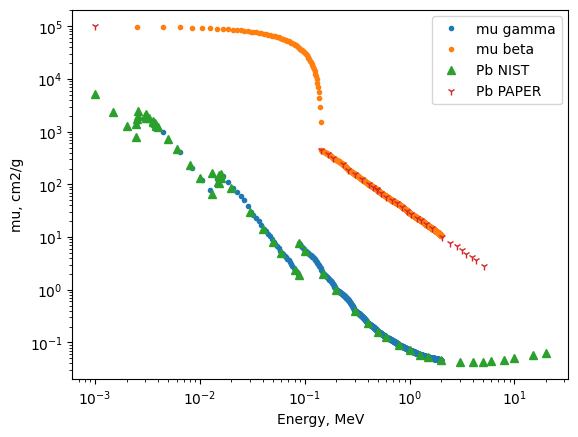

In [154]:
# Cobalt-60
beta_Emax = 0.31 # MeV, Cobalt-60 beta-decay maximum
gamma_Energy = 1.173 # # MeV, Cobalt-60 gamma-decay

material = 'Pb'
depth_max = 1.75 #cm
rho = 11.35 # g/cm3

I0 = zero_spectrum()
I0_beta = beta_spectrum(beta_Emax)
I0 += gamma_spectrum(1.173)
I0 += gamma_spectrum(1.332)
I0 /= np.sum(I0)
I0_beta /= np.sum(I0_beta)


mu_spectrum_gamma = mu_interpolate(Espace, material=material, decaytype='gamma')
mu_spectrum_beta = mu_interpolate(Espace, material=material, decaytype='beta')
plt.plot(Espace, mu_spectrum_gamma, '.', label=f'mu gamma')
plt.plot(Espace, mu_spectrum_beta, '.', label=f'mu beta')

# Reference data
E, mu_gamma = get_Emu(material, 'gamma')
plt.plot(E, mu_gamma, '^', label=f'{material} NIST')
E, mu_beta = get_Emu(material, 'beta')
plt.plot(E, mu_beta, '1', label=f'{material} PAPER')

plt.xlabel('Energy, MeV')
plt.ylabel('mu, cm2/g')
plt.legend()

#plt.axvline(beta_Emax, ymin=0, ymax=1, color='k', linestyle='--')
#plt.axvline(gamma_Energy, ymin=0, ymax=1, color='k', linestyle='--')
plt.xscale('log')
plt.yscale('log')

<ipython-input-141-8581339b9dd3>:3: RuntimeWarning: overflow encountered in exp
  i_spectrum += I0_beta * np.exp(- mu_spectrum_beta * depth * rho)
<ipython-input-141-8581339b9dd3>:3: RuntimeWarning: invalid value encountered in multiply
  i_spectrum += I0_beta * np.exp(- mu_spectrum_beta * depth * rho)


Text(0, 0.5, 'Intensity spectrum, a.u.')

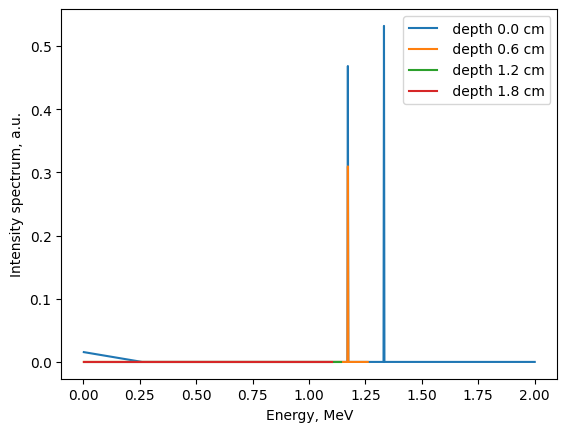

In [141]:
for depth in np.linspace(0, depth_max, 4):
  i_spectrum  = I0 * 0
  i_spectrum += I0 * np.exp(- mu_spectrum_gamma * depth * rho)
  i_spectrum += I0_beta * np.exp(- mu_spectrum_beta * depth * rho)
  plt.plot(Espace, i_spectrum, label=f' depth {depth:.1f} cm')

plt.legend()
plt.xlabel('Energy, MeV')
plt.ylabel('Intensity spectrum, a.u.')


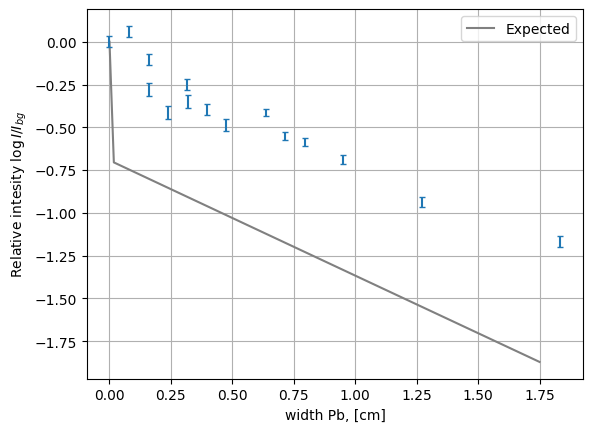

In [159]:
total_i = np.array([])
depths = np.linspace(0, depth_max, 100)
for depth in depths:
  s = np.sum(I0 * np.exp(- mu_spectrum_gamma * depth * rho) )
  s += np.sum(I0_beta * np.exp(- mu_spectrum_beta * depth * rho) )
  total_i = np.append(total_i, s )

total_i /= total_i[0]
plt.plot(depths, np.log(total_i), color='gray', label='Expected')

# station 4
# Co-60_3
# sample 2
# shelf 3
# Pb plates
URL = 'https://raw.githubusercontent.com/tphlabs/data/main/Lab4_Nuclear/2023_12_28/'
for num in [3]:
  filename = f'Co-60_{num}.txt'
  data = np.genfromtxt( URL+filename)
  d, time, counts = data.T
  d *= 1e-4 # um -> cm
  delta = 1/np.sqrt(counts) # relative error
  I = counts / time
  I_rel = I / I[0] # relative
  I_err = delta * I_rel
  log_I_rel = I_err / I_rel # error of log

  plt.errorbar(d, np.log(I_rel), yerr=log_I_rel, linestyle='', capsize=2)

plt.xlabel(f'width {material}, [cm]')
plt.ylabel(r'Relative intesity $\log I/I_{bg}$')
plt.grid()

plt.legend()

#Th-204 vs Al

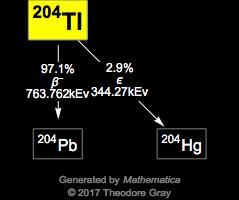

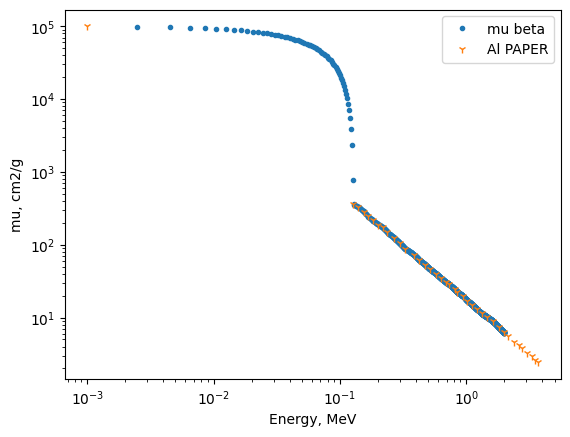

In [168]:
# Thallium-204
material = 'Al'
depth_max = 0.1 #cm
rho = 2.7 # g/cm3

I0_beta = beta_spectrum(0.763)
I0_beta /= np.sum(I0_beta)


mu_spectrum_beta = mu_interpolate(Espace, material=material, decaytype='beta')
plt.plot(Espace, mu_spectrum_beta, '.', label=f'mu beta')

# Reference data
E, mu_beta = get_Emu(material, 'beta')
plt.plot(E, mu_beta, '1', label=f'{material} PAPER')

plt.xlabel('Energy, MeV')
plt.ylabel('mu, cm2/g')
plt.legend()

#plt.axvline(beta_Emax, ymin=0, ymax=1, color='k', linestyle='--')
#plt.axvline(gamma_Energy, ymin=0, ymax=1, color='k', linestyle='--')
plt.xscale('log')
plt.yscale('log')

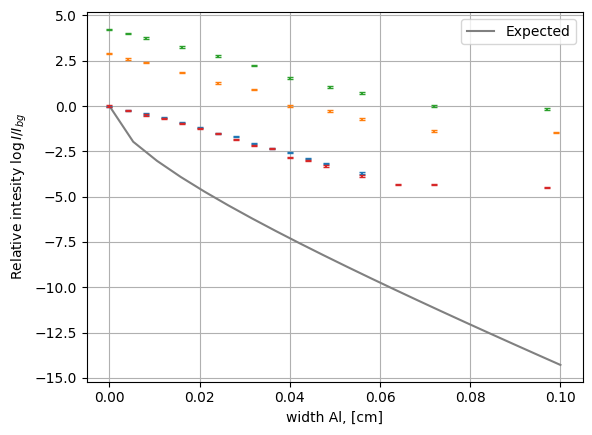

In [169]:
total_i = np.array([])
depths = np.linspace(0, depth_max, 20)
for depth in depths:
  s = np.sum(I0_beta * np.exp(- mu_spectrum_beta * depth * rho) )
  total_i = np.append(total_i, s )

total_i /= total_i[0]
plt.plot(depths, np.log(total_i), color='gray', label='Expected')

URL = 'https://raw.githubusercontent.com/tphlabs/data/main/Lab4_Nuclear/2023_12_28/'

for num in [2, 3, 5, 7]:
  filename = f'Tl-204_{num}.txt'
  d, counts, time = np.genfromtxt( URL + filename, unpack=True)

  # sort by d
  idx = np.argsort(d)


  d = d * 1e-1 # mm -> cm
  delta = 1/np.sqrt(counts) # relative error
  I = counts / time
  I_rel = I / I[0] # relative
  I_err = delta * I_rel
  log_I_rel = I_err / I_rel # error of log

  plt.errorbar(d, np.log(I_rel), capsize=2, yerr=log_I_rel, linestyle='')

plt.xlabel('width Al, [cm]')
plt.ylabel(r'Relative intesity $\log I/I_{bg}$')
plt.grid()
plt.legend()


#Strontium-90 vs. Al

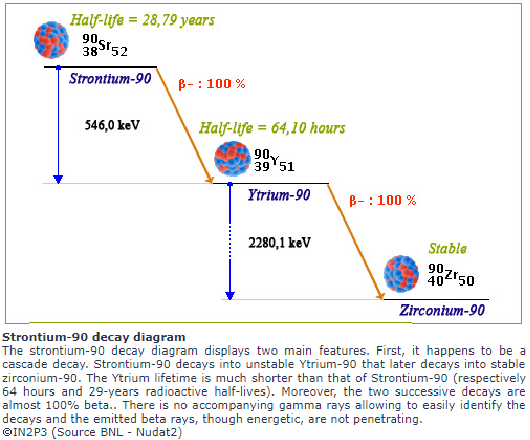

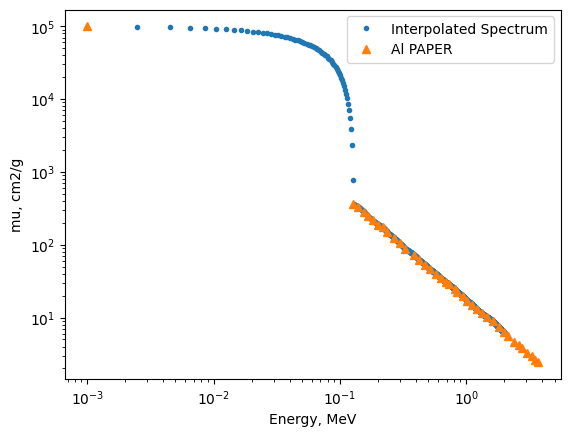

In [173]:
material = 'Al'
depth_max = 0.6 #cm
rho = 2.7 # g/cm3

I0 = zero_spectrum()
I0 += beta_spectrum(0.546)
I0 += beta_spectrum(2.280)
I0 /= np.sum(I0) # normalize

mu_spectrum = mu_interpolate(Espace, material=material, decaytype='beta')
plt.plot(Espace, mu_spectrum, '.', label=f'Interpolated Spectrum')

# Reference data
E, mu = get_Emu(material, rays='beta')
plt.plot(E, mu, '^', label=f'{material} PAPER')

plt.xlabel('Energy, MeV')
plt.ylabel('mu, cm2/g')
plt.legend()

plt.xscale('log')
plt.yscale('log')

Text(0, 0.5, 'Intensity spectrum, a.u.')

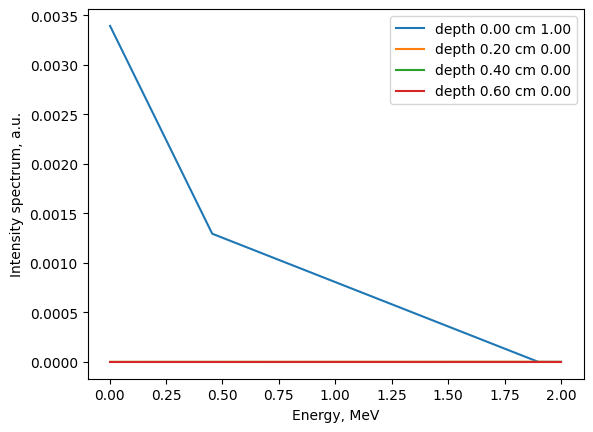

In [175]:
for depth in np.linspace(0, depth_max, 4):
  i_spectrum = I0 * np.exp(- mu_spectrum * depth * rho)
  plt.plot(Espace, i_spectrum, label=f'depth {depth:.2f} cm {np.sum(i_spectrum):.2f}')

plt.legend()
plt.xlabel('Energy, MeV')
plt.ylabel('Intensity spectrum, a.u.')

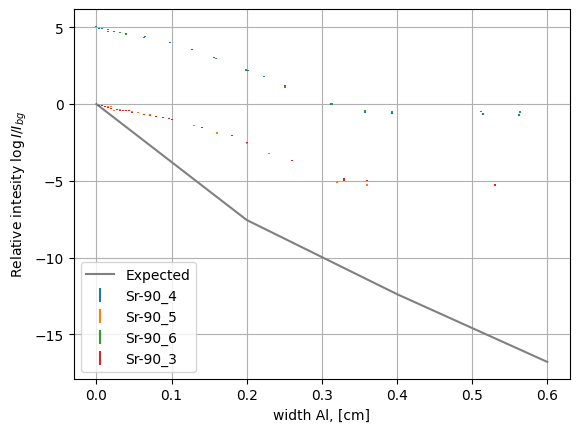

In [176]:
total_i = np.array([])
depths = np.linspace(0, depth_max, 4)
for depth in depths:
  s = np.sum(I0 * np.exp(- mu_spectrum * depth * rho) )
  total_i = np.append(total_i, s )

total_i /= total_i[0]
plt.plot(depths, np.log(total_i), color='gray', label='Expected')

URL = 'https://raw.githubusercontent.com/tphlabs/data/main/Lab4_Nuclear/2023_12_26/'
for num in [4, 5, 6, 3]:
  filename = f'sr-90-{num}.txt'
  d, counts, time = np.genfromtxt(URL + filename).T
  d = d /10 # mm -> cm
  delta = 1/np.sqrt(counts) # relative error
  I = counts / time
  I_rel = I / I[0] # relative intensity
  I_err = delta * I_rel
  log_I_rel = I_err / I_rel # error of log

  plt.errorbar(d, np.log(I_rel), yerr=log_I_rel, linestyle='', label=f'Sr-90_{num}')

plt.xlabel('width Al, [cm]')
plt.ylabel(r'Relative intesity $\log I/I_{bg}$')
plt.grid()
plt.legend()
